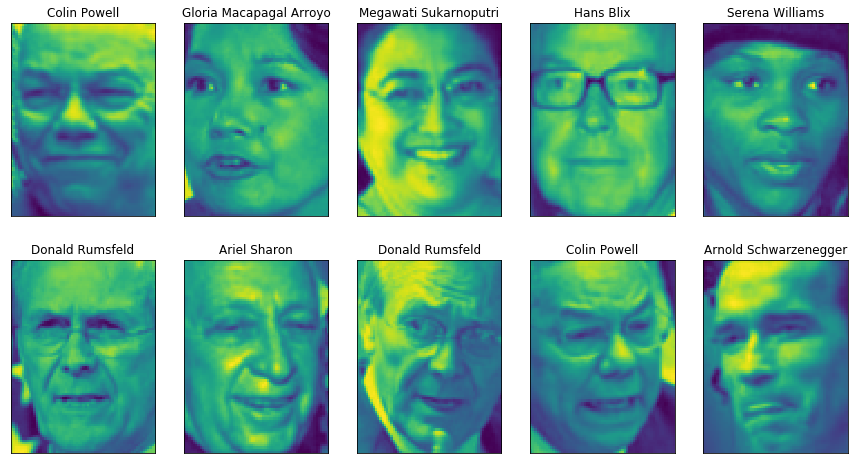

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person=28, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [3]:
print("people images shape: {}".format(people.images.shape))
print("Jumlah class: {}".format(len(people.target_names)))

people images shape: (2484, 87, 65)
Jumlah class: 38


In [5]:
# merubah data agar tidak skewed
import numpy as np

mask = np.zeros(people.target.shape, dtype=np.bool)
for targen in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale warna dataset menjadi grayscale, nilai antara 0 dan 1
X_people = X_people/255
X_people[:1]

array([[0.01699346, 0.02222222, 0.04705882, ..., 0.24183007, 0.2496732 ,
        0.25359476]], dtype=float32)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [7]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

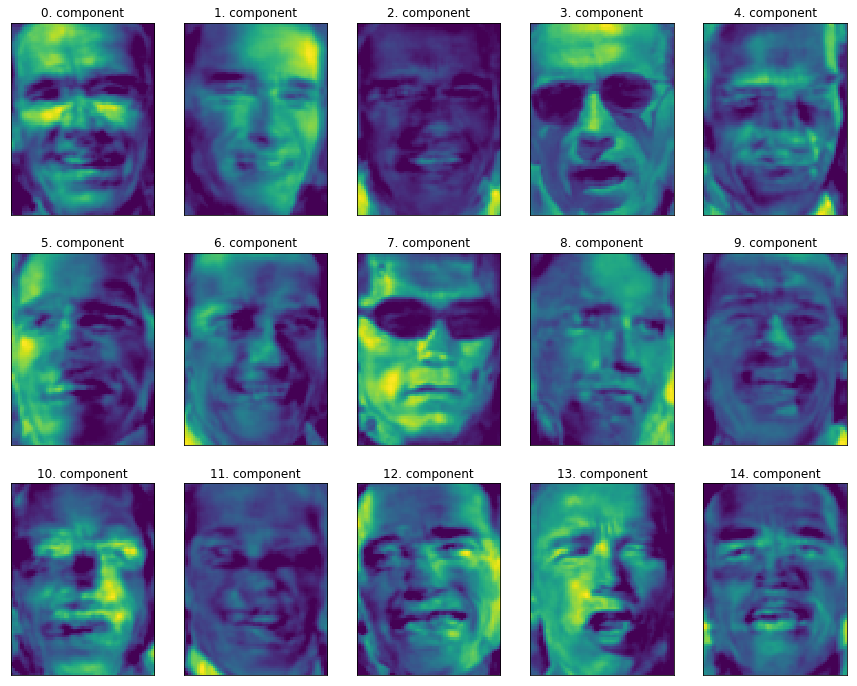

In [10]:
# plot
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))